## Homework 1 - Supervised Learning

## Problem 1: Set up Github and clone assignment repo. 

**REMINDER ON HOW TO SUBMIT:**


- Go to http://www.github.com and create an account.
- Fill out this spreadsheet with your Github username and Columbia UNI https://docs.google.com/spreadsheets/d/1KEBDe8H0x_drnqx4ZeMyMUN-6-LrDVy2tBBJ97RZtMY/edit?usp=sharing

- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. **Make sure to install command line tools. **
- Click on this link: https://classroom.github.com/a/Xk990Gdv
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/apmae4990-hw-project-{your-git-username}```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!). **This is where you will store all of your homework and your final project. **


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ cd apmae4990-hw-project-{your-git-username} ```

``` $ git add myhomeworksolutions.ipynb ``` ( this adds your homework to the files to be pushed )

``` $ git status ``` ( this shows which files have been modified and will be part of the commit)

``` $ git commit -m "added my homework 1 solutions" ``` (commits the files for the push to the repo)

``` $ git push origin master $ ``` (pushes the files to the repo)

**Writing to the notebook:** To write code in this notebook, you can create a new cell directly below the problem. Either click `Insert -> Insert Cell Below` or type `CTRL-M` **then** `B`.


### Very important!!

Do not expect to understand every single import statement or piece of code when you first start. You should always think about what your goal is, and try to figure out how to do it yourself. However in many cases it is much easier to simply search stack overflow for the *right* way to do something. You are free to do this and do not need to include any references. This is largely how engineers and data scientists discover things in practice when they are unfamiliar with a topic. 


## Problem 2: Sales Data Analysis

In this problem we will explore our first dataset using `pandas` (for loading and procssing our data) and `sklearn` (for building machine learning models).

In [30]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy.random as nprnd
import random
import numpy as np
import statsmodels.formula.api as sm
import matplotlib as mpl
import matplotlib.pyplot as mplt
import math
import scipy

%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features (variables, covariates, all mean the same thing)?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper
- **Sales:** Number of 1k units sold. 

**Goal:** Predict the amount of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the variable ranges.

**[5 points]** Use df.boxplot()

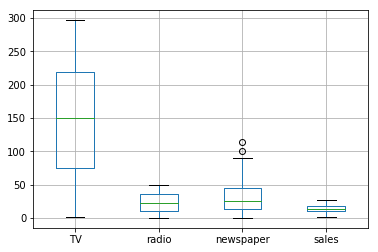

In [31]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using `pandas.plotting.scatter_matrix`

**[5 points]** Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCA1B11320>,
      dtype=object)

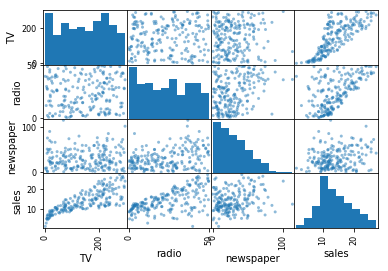

In [32]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer. 

Why might these variables be correlated in intuitive terms?

**Comment:** TV, newspapers are correlated with sales because we can see a positive relation between them. However, the relationship between newspaper and sales is not so signifcant.

As the money spent on TV and newspaper advertisement increases, the audience will receive more information about the product. Compared with digital advertisement, newspapers are not as effective as them.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

**Note:** This example does not randomize the test/train split. So please ensure you've done this using `test_train_split`. 

In [33]:
from sklearn.linear_model import LinearRegression

**[2 points]** a) Set y to be the sales in df

In [34]:
y = df[['sales']]

**[2 points]** b) Set X to be just the features described above in df. Because we need to add an intercept in, also create a new column called `interecept` which is just 1. 

In [35]:
X = df.drop(['sales'], axis = 1)
newcol=[1]*len(y)
X.insert(loc=0,column='intercept',value=newcol)

**[5 points]** c) Randomly split data into training and testing - 80% training, 20% testing. Make sure your test/train split is random. 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle = True)

**[5 points]** d) Train model on training data, and make predictions on testing data, using our solution from class

$$ \beta = (X^TX)^{-1}X^Ty.$$

It will be useful to use `np.linalg.inverse`. 

In [37]:
def betahat(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

def yPredict(X, beta):
    return np.dot(X, beta)

beta=betahat(X_train.values, y_train.values)
yhat = yPredict(X_test, beta)

**[5 points]** e) Train model on training data, and make predictions on testing data, using `sklearn.linear_model.LinearRegression`. Make sure your answer matches part d).

In [38]:
mod = LinearRegression(fit_intercept=False)
mod.fit(X_train, y_train)
sklearnRes = mod.predict(X_test)

**[5 points]** f) Evalute the R^2 on training data and testing data. Is this good? Bad? Why?

In [39]:
# Code here
from sklearn.metrics import r2_score
r2_score(y_test.values, mod.predict(X_test))

0.8125065896001661

In [40]:
r2_score(y_train.values, mod.predict(X_train))

0.9153761500119654

**Comment:** Train R square score is higher than test R square score and these values are around 0.8 to 0.85 which is pretty good so far.

**[5 points]** g) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a *good* model?

Text(0, 0.5, 'true value')

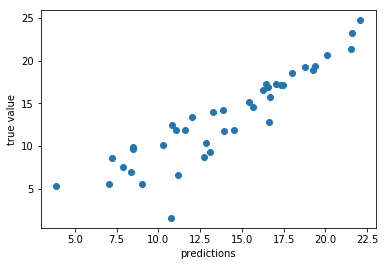

In [41]:
plt.scatter(sklearnRes, y_test)
plt.xlabel("predictions")
plt.ylabel("true value")

**Comment:** We can see a clear positive trend between predictions and true values, which means it is a good model. However, it is still necessary to mention that there are still some outliers.

**[5 points]** f) Interpreting the coefficients of your model (`clf.coef_1`), which form of advertising appears to have the largest impact on sales? Which has the least impact?

In [42]:
print("coefficients[TV,Radio,Newspaper]: ", mod.coef_[0])

coefficients[TV,Radio,Newspaper]:  [3.07640364 0.04364267 0.19161111 0.00637977]


**Comment:** It seems that radio has the most powerful impact and the newspapers has the least impact.

**[10 points]** g) Plot the coefficients along with their confidence intervals, recalling that 

$$\beta \sim \mathcal{N}(\hat \beta, \hat \sigma^2(X^TX)^{-1}).$$

The variance of the coefficients are the diagonal elemements of the covariance matrix $\sigma^2(X^TX)^{-1}$, where $\hat \sigma$ is the estimated residuals. 

Ensure you obtain the same results for the variance of the coefficients as when you use:
```
import scipy, scipy.stats

result = sm.OLS( y, X ).fit()
result.summary()
```

In [43]:
residual_train = y_train.values - mod.predict(X_train)
varY = sum(residual_train**2)/(len(residual_train)-4)
cov = np.linalg.inv(X_train.T.dot(X_train))*varY
np.sqrt(cov.diagonal())

array([0.3069226 , 0.00143906, 0.00870879, 0.00624021])

In [44]:
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     562.5
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           2.12e-83
Time:                        01:07:06   Log-Likelihood:                -292.18
No. Observations:                 160   AIC:                             592.4
Df Residuals:                     156   BIC:                             604.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0764      0.307     10.023      0.000       2.470       3.683
TV             0.0436      0.001     30.327      0.000       0.041       0.046
radio          0.1916      0.009     22.002      0.000       0.174       0.209
newspaper      0.0064      0.006      1.022      0.308      -0.006       0.019
==============================================================================
Omnibus:                       22.697   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.054
Skew:                          -0.899   Prob(JB):                     8.10e-07
Kurtosis:                       3.988   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

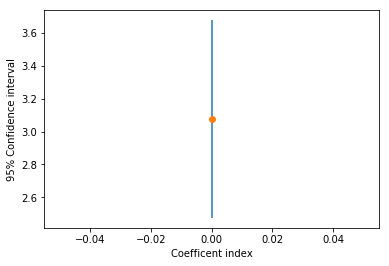

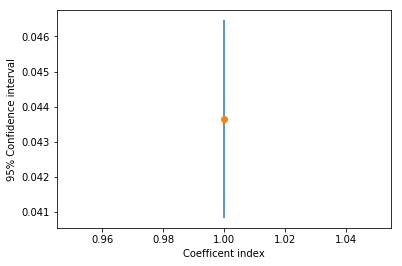

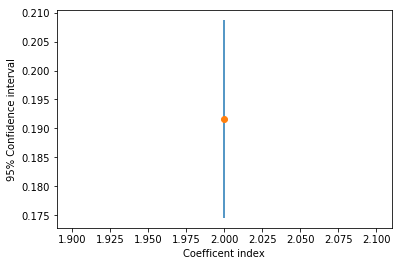

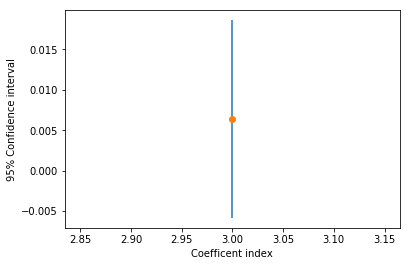

In [45]:
for i in range(4):
    mu=beta[i]
    variance=cov[i,i]
    sd=math.sqrt(variance)
    plt.errorbar(i, mu, xerr=0, yerr=1.96*sd, linestyle='')
    plt.plot(i,mu,'o')
    plt.xlabel("Coefficent index")
    plt.ylabel("95% Confidence interval")
    plt.show()

**[10 points]** h) Repeat the steps above but **build a seperate model for each individual feature**, ie. `X = df[col]` where `col` is one of the variables TV, radio and newspaper. Based on this analysis, which feature now appears to have more of an influence on sales? Which has practically none? Provide an interpretation of this apparent contradiction. 

**Hint:** It may be useful to check the correlation matrix using `df.corr()` and to understand how the covariates relate to one another. 

In [46]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [47]:
def linearR2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle = True)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    sklearnRes = model.predict(X_test)
    return {'R2_train': r2_score(y_train.values, model.predict(X_train)), 
            'R2_test': r2_score(y_test.values, model.predict(X_test)),
            'coef': model.coef_,
            'model':model}
print("TV")
print(linearR2(df[['TV']], df[['sales']]))
print("radio")
print(linearR2(df[['radio']], df[['sales']]))
print("newspaper")
print(linearR2(df[['newspaper']], df[['sales']]))

TV
{'R2_train': 0.6015109800911669, 'R2_test': 0.621213909652444, 'coef': array([[0.04508535]]), 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)}
radio
{'R2_train': 0.2946454767549773, 'R2_test': 0.42593209242054, 'coef': array([[0.19052102]]), 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)}
newspaper
{'R2_train': 0.052802831310866605, 'R2_test': 0.039487565810762515, 'coef': array([[0.05699874]]), 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)}


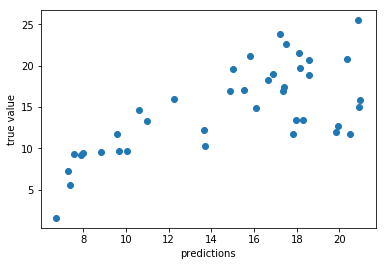

In [48]:
def linearplot(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle = True)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    sklearnRes = model.predict(X_test)
    plt.scatter(sklearnRes, y_test)
    plt.xlabel("predictions")
    plt.ylabel("true value")
    
linearplot(df[['TV']], df[['sales']])

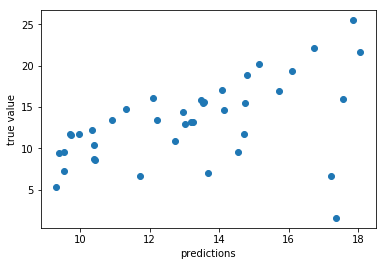

In [49]:
linearplot(df[['radio']], df[['sales']])

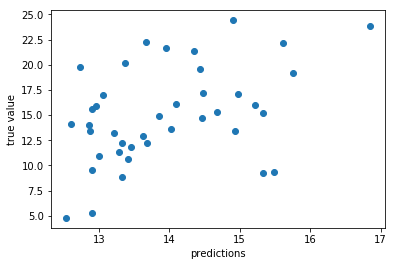

In [50]:
linearplot(df[['newspaper']], df[['sales']])

**Comment:** TV and radios appear to have more of an influence on sales. Newspaper has practically none. It can be obtained clearly from the trend of plots above.

**[10 points]** i) (synnergetic effects) Try plotting the data in three dimensions along with the hyperplane solution to see where the solution you have stops following the linear trend, and see if you can infer
a new variable which will help, which is a product of two of our current variables.  More precisely, our previous model has been:

$$ y = \beta_0 x_{0} +  \beta_0 x_{1} +  \beta_0 x_{2} + \epsilon.$$

See if you an introduce a new term $$ \beta_{ij} x_i x_j$$ for some j using your intuition from the previous problems.

What is your interpretation of this result?

** Hint: The code below can be adopted to make your 3d plot.**

Text(0.5, 0, 'sales')

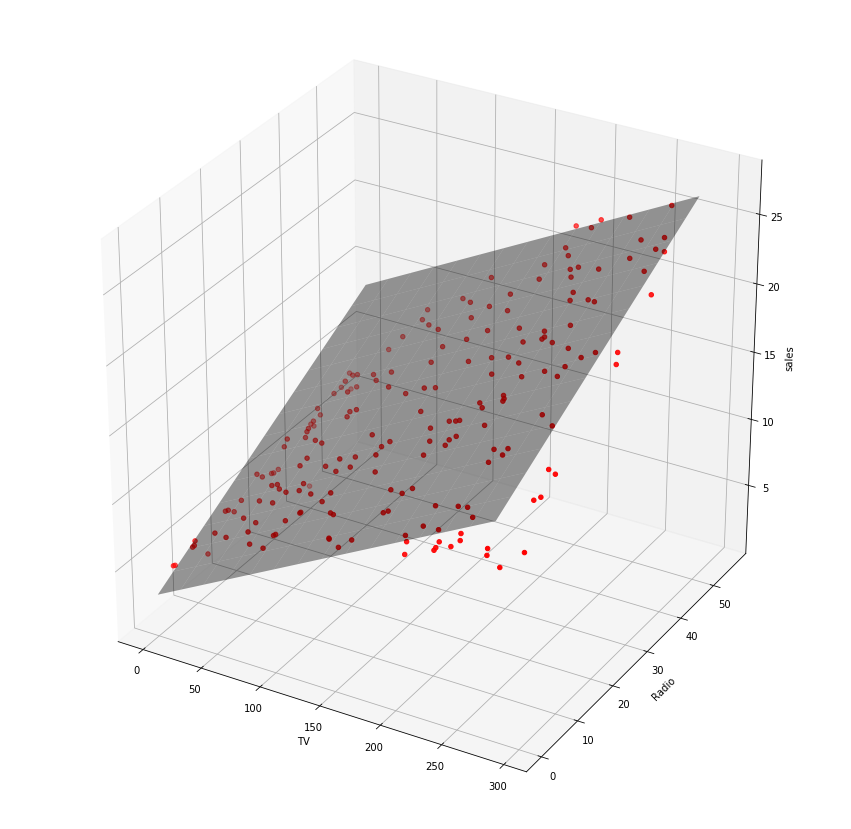

In [51]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 300, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

new_x = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
# define your regr_1
regr_1 = linearR2(df[['TV', 'radio']], y)["model"]
predict_sales = regr_1.predict(new_x)
ax.plot_surface(x_surf, y_surf,
                predict_sales.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(X['TV'], X['radio'], y, c='r', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('sales')

It appears here that there is some nonlinear interaction, the hyperplane seems to distance itself for large values of TV and Radio

**[5 points]** h) Does your mixed variable in i) imporve performance? Why?

In [52]:
linearR2(X[['TV', 'radio', 'intercept']], y)

{'R2_train': 0.8984956924740913,
 'R2_test': 0.8882779396482716,
 'coef': array([[0.04702224, 0.18373404, 0.        ]]),
 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)}

In [53]:
X['mixed'] = X['TV']*X['radio']
linearR2(X[['TV', 'radio', 'mixed', 'intercept']], y)

{'R2_train': 0.9751717368310653,
 'R2_test': 0.9250413203662432,
 'coef': array([[0.0203116 , 0.05148002, 0.00098599, 0.        ]]),
 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)}

**Comment:** Yes, we can see an improvement in R2 score.

## Problem 4: Regularization and model selection

We had quite a hard time discovering the variables which had true predictive power in the previous section. What if we pnealized
the size of the coefficients in order to select the most predictive features?

Let $$ F_{\alpha}^p(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}^{(i)})^2 + \alpha \|\beta\|_{L^p}^p.$$

We call $F_{\alpha}^p$ to be the *Lasso* norm when $p=1$ and *Ridge* norm when $p=2$. 

** [5 points] ** a) First rescale you features to have mean zero and unit variance using


```from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
y_scaled = y - np.mean(y)```

In [54]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X.drop(['mixed', 'intercept'], axis = 1))
y_scaled = y - np.mean(y)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['TV', 'radio', 'newspaper']
X_scaled['intercept'] = 1

** [5 points] ** a) Repeat the regression above, but using `sklearn`'s `Lasso()` method with $\alpha=0$ on the new scaled features. Notice you may obtain a warning. Can you explain what the warning about convergence of the gradient descent method may mean?

In [55]:
from sklearn import linear_model
regLasso = linear_model.Lasso(alpha=0)
regLasso.fit(X_scaled, y_scaled)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

**Comment:** As alpha goes to 0, we get the least squre solution. If this algorithm does not coverge well in this case, maybe $X^TX$ is not invertible so that it's hard for us to obtain a decent solution.

** [10 points] ** b) Choose a range of $\alpha$ ranging from 0 to 1. Why does the $R^2$ score on test data seem to increase then decrease again?
Plot the $R^2$ on test data as you vary $\alpha$. 

**Note:** Because of the randomness, you may need to experiment a bit with replacing 1 by smaller or lower numbers. The goal is to find a concave region. Also, to create a collection of  uniformly distributed points from 0 to 1, you can use:

```import numpy as np
alphas = np.linspace(0,1,num_samples)
```

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'change of $R^2$ as alpha increasing')

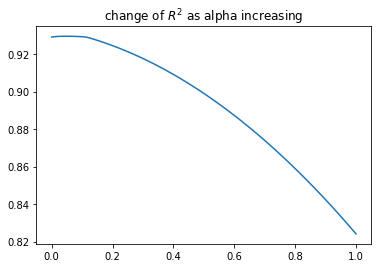

In [56]:
from sklearn.linear_model import Lasso
alphas = np.linspace(0, 1, 100)
scores = []
coefResult = []
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y_scaled, train_size = 0.8, test_size = 0.2, shuffle = True)
for each_alpha in alphas:
    regLasso = Lasso(alpha = each_alpha, fit_intercept = False, max_iter=1500)
    regLasso.fit(X_trains, y_trains)
    scores.append(regLasso.score(X_tests,y_tests))
    coefResult.append(regLasso.coef_)
plt.plot(alphas,scores)
plt.title("change of $R^2$ as alpha increasing")

**Comment:** After we reached the best value of alpha, the MSE increases so that R2 score decreaces.

**[10 points]** c) Choose the *best* $\alpha$ from part b) (you can use `alphas[np.argmax(scores)]`). What is your new score on test data? (it may not change much) What are the coefficients for this model and how do they compare as $\alpha$ ranges from close to $0$ to larger values?

In [57]:
best=alphas[np.argmax(scores)]
best

0.05050505050505051

In [58]:
regLasso = Lasso(alpha = best, fit_intercept = False)
regLasso.fit(X_trains, y_trains)
regLasso.score(X_tests,y_tests)

0.929464761630551

In [59]:
regLasso.coef_

array([ 3.87917911,  2.65273624,  0.        , -0.06053995])

Text(0.5, 0, 'alpha')

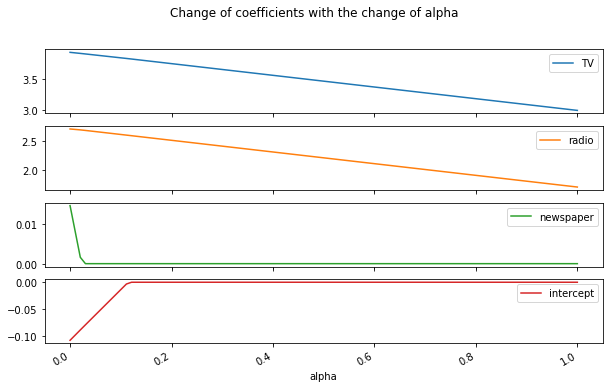

In [60]:
coefDf = pd.DataFrame(coefResult, columns = X_trains.columns)
coefDf.index = alphas
coefDf.plot(subplots = True, title = "Change of coefficients with the change of alpha", \
            figsize = (10,6))
plt.xlabel('alpha')

**Comment:** As alpha increases, all coefficients tend to close to 0.

**[10 points]** d) Experiment with different values of $\alpha$ in part b) but now using `Ridge()`? How do the coefficients vary as you vary $\alpha$ in the `Ridge` method? 

How do you explain the difference between this observation and the solution in part c) based on the level sets of $L^p$ for $p=1$ and $p=2$.

Text(0.5, 1.0, 'change of $R^2$ as alpha increasing')

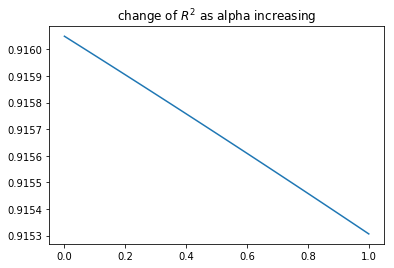

In [61]:
from sklearn.linear_model import Ridge
rscores = []
rcoefResult = []
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y_scaled, train_size = 0.8, test_size = 0.2, shuffle = True)
for each_alpha in alphas:
    regRidge = Ridge(alpha = each_alpha, fit_intercept = False, max_iter=1500)
    regRidge.fit(X_trains, y_trains)
    rscores.append(regRidge.score(X_tests,y_tests))
    coefResult.append(regRidge.coef_)
plt.plot(alphas,rscores)
plt.title("change of $R^2$ as alpha increasing")

**Comment:** L2 regularization tends to have a stable solution due to the properties that non-sparse outputs and no feature selection.

**[5 points]** Did we need to rescale in part a)? Why would our solution not make sense otherwise?

**Comment:** The result looks good therefore we don't need to rescale it.

## Problem 5:  Gradient Descent and the learning rate

**[10 points]** a) By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [62]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [63]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [64]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


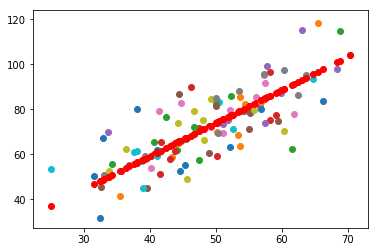

In [65]:
def run(num_iterations,learning_rate=0.0001):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

    
run(10)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


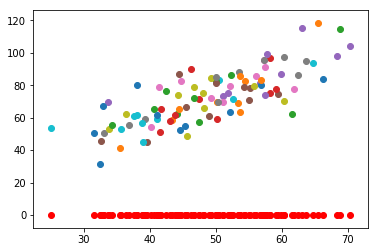

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


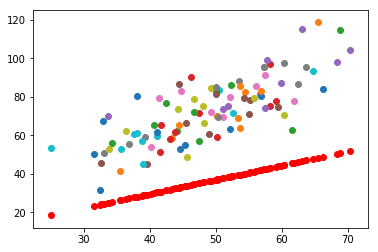

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


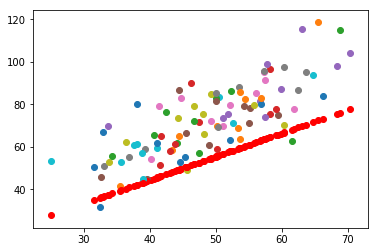

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


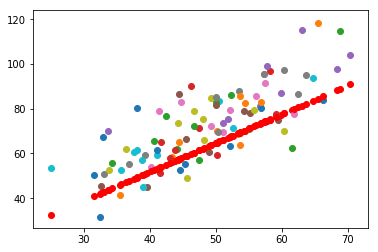

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


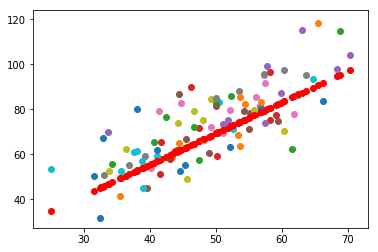

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


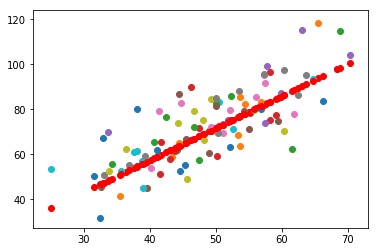

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


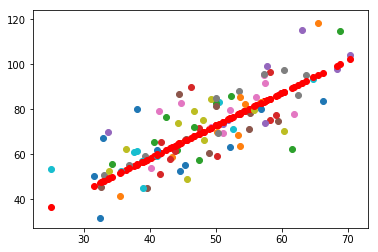

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


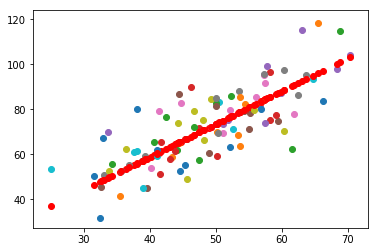

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


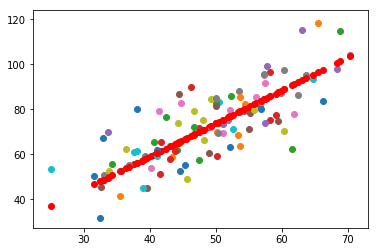

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


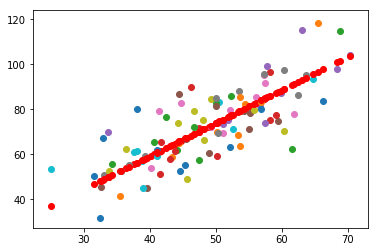

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


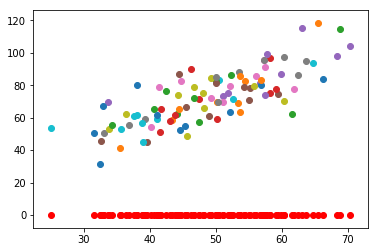

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


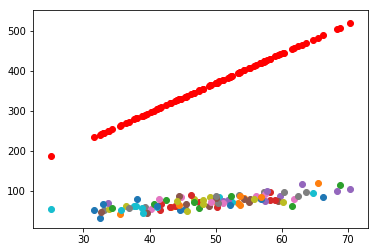

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


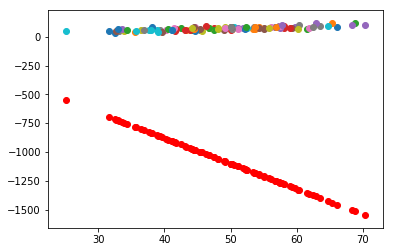

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


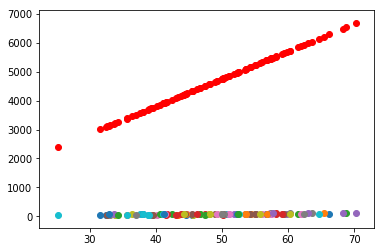

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


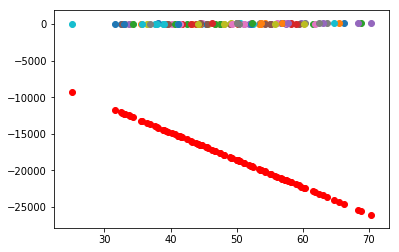

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


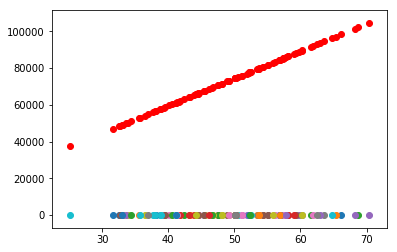

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


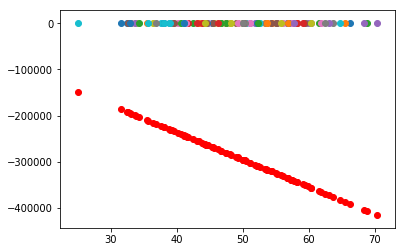

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


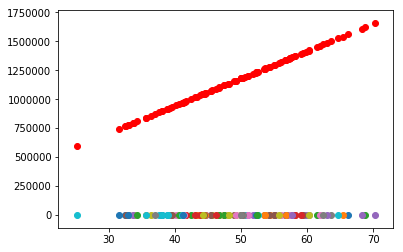

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


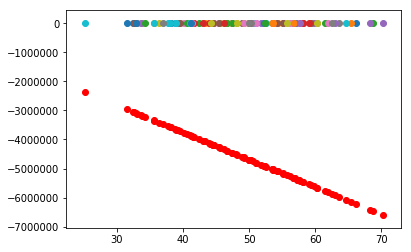

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


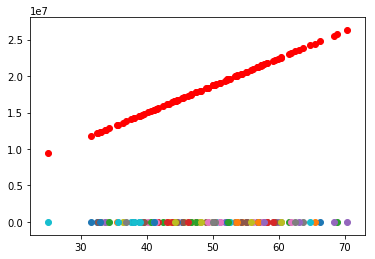

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


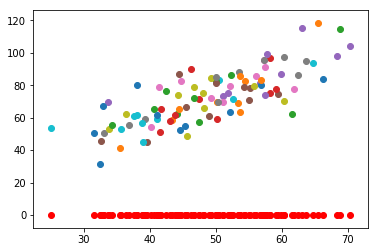

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


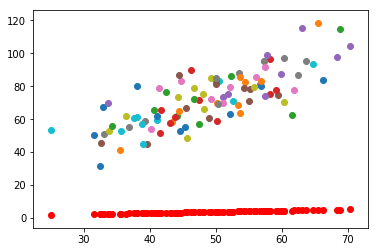

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


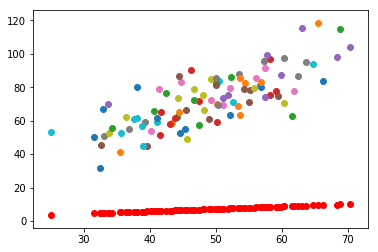

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


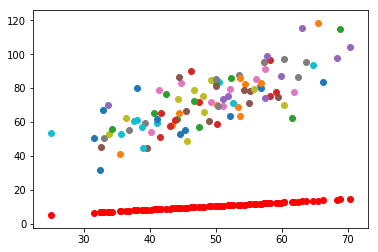

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


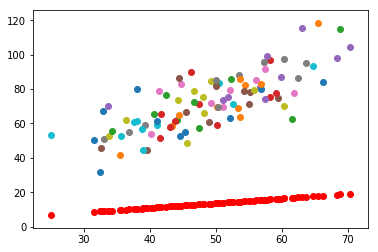

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


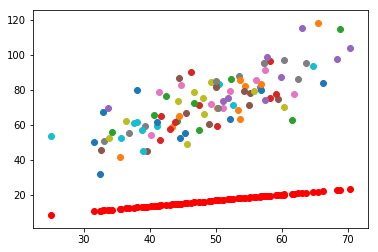

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


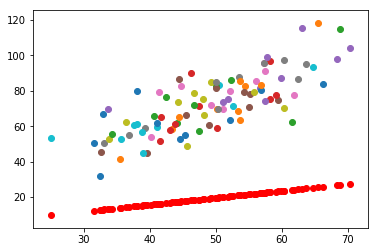

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


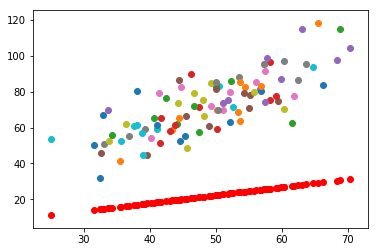

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


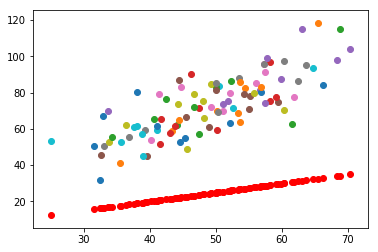

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


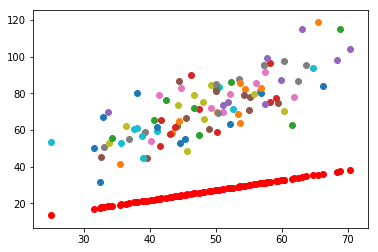

In [66]:
# learning rate=0.0001, which is a moderate number. It converges at a proper speed
for num in range(0,10):
    run(num)
    plt.show()
    
# learning rate=0.1, which is too large. It does not converge.
for num in range(0,10):
    run(num,0.001)
    plt.show()

# learning rate=0.00001, which is too small. The convergence takes longer time.
for num in range(0,10):
    run(num,0.00001)
    plt.show()

b) **[10 points]** Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

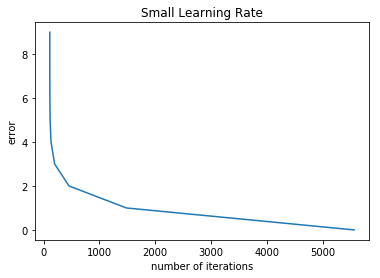

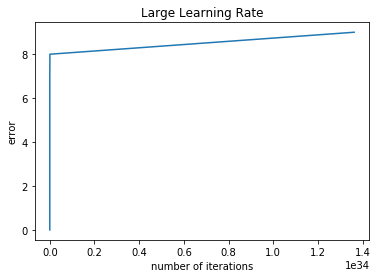

In [67]:
def plot_itrn_err(rate):
    itrn=np.zeros(10)
    err=np.zeros(10)
    for num in range(0,10):
        points = genfromtxt("data.csv", delimiter=",")
        learning_rate = rate
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        num_iterations = num
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        itrn[num]=num
        err[num]=compute_error_for_line_given_points(b, m, points)
    plt.plot(err,itrn)

plt.title('Small Learning Rate')
plt.ylabel('error')
plt.xlabel('number of iterations')
plot_itrn_err(0.0001)

plt.show()

plt.title('Large Learning Rate')
plt.ylabel('error')
plt.xlabel('number of iterations')
plot_itrn_err(0.01)

plt.show()

# Problem 6 : Computing to Problem 2 via gradient descent. 

Let 

$$ \hat F(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \frac{1}{N}\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2, $$

where $(\mathbf{x}_i, y_i)$ are as in Problem 2. 


**[10 points]** a) Solve $\nabla \hat F(\beta) = 0$ for $\beta$ in terms of $\mathbf{X}$ and $\mathbf{y}$ and show that the solution is

$$ \beta = (\mathbf X^T\mathbf X)^{-1} \mathbf X \mathbf y. $$

*Hint:*
Use the product rule for inner products afer rewriting

$$\|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2  = \langle \mathbf{y} - \mathbf{X} \beta, \; \mathbf{y} - \mathbf{X} \beta \rangle. $$

**Solution:**  
Since $$\nabla \langle F(\beta), G(\beta) \rangle = \langle \nabla F(\beta), G(\beta) \rangle + \langle F(\beta), \nabla G(\beta) \rangle. $$

$$\nabla F(\beta) = \nabla \langle Y-X\beta, Y-X\beta \rangle$$
$$= \langle \nabla(Y-X\beta), Y-X\beta \rangle + \langle Y-X\beta, \nabla(Y-X\beta) \rangle = 0$$
since$$Y^TX\beta = (Y^TX\beta)^T = \beta^TX^TY$$
$$\nabla F(\beta) = -2X^TY+2X^TX\beta=0$$
$$\beta=(X^TX)^{-1}X^TY$$

**[5 points]** b)  What assumption did you have to make to solve for $\beta$ in in part a)? 

**Solution:** 
1. **Linearity**:Relationship between X and y are linear
2. **Normality of Errors**: The conditional mean should be zero
3. **Invertible**: $X^TX$ is invertible.
4. **No Multicollinearity**: There is no multi-collinearity (or perfect collinearity)
5. **Independence/No Autocorrelation**: There is homoscedasticity and no autocorrelation.

**[10 points]** c) Let $\beta_0 = (0, 0, 0)$ and $\nu =0.01$. Using your computation of $\nabla F(\beta)$ from a), write a function in Python which iterates

$$\beta_t = \beta_{t-1} - \nu \nabla \hat F(\beta_{t-1})$$ from $t=0,...,T$ for the original, unscaled variables $X,y$.  Are you having trouble with convergence? If so, consider more iterations and a much smaller learning rate. Why do you think we had to do this in this case? 

In [68]:
def fprime(x, y, beta):
    return(2*x.T.dot(x).dot(beta) - 2*x.T.dot(y).T[0])
def gd(lam, beta0, steps, x, y):
    beta = beta0
    error_list = []
    for i in range(steps):
        delta = fprime(x, y, beta)
        beta = beta - lam*delta
        error = sum((y - beta.dot(x.T))**2)
        error_list.append(error)
    return beta, error_list

In [69]:
result = gd(lam = 0.01, beta0 = np.array([0,0,0,0]), steps =300, \
                          x = X_train.values, y = y_train.values)
beta = result[0]
error = pd.DataFrame(result[1], columns = ['error'])
error.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


,error
0,5.257403e+16
1,5.182687e+26
2,5.109187e+36
3,5.036729e+46
4,4.965299e+56


Text(0.5, 0, 'small steps')

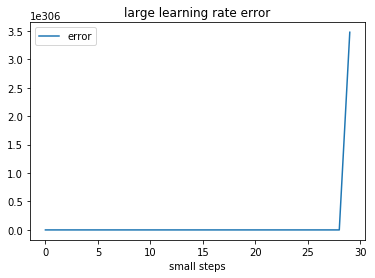

In [70]:
error.plot(title = 'large learning rate error')
plt.xlabel('small steps')

In [71]:
result = gd(lam = 0.0000001, beta0 = np.array([0,0,0,0]), steps = 500, \
                          x = X_train.values, y = y_train.values)
beta = result[0]
error = pd.DataFrame(result[1], columns = ['error'])
error.head()

,error
0,1.905617e+06
1,1.901852e+06
2,1.888943e+06
3,1.876501e+06
4,1.864573e+06


Text(0.5, 0, 'large steps')

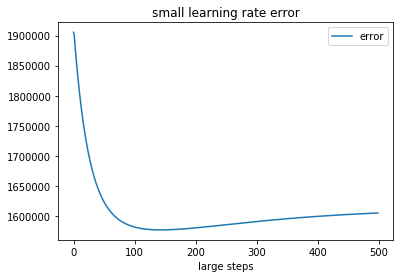

In [72]:
error.plot(title = 'small learning rate error')
plt.xlabel('large steps')

**Solution:** We can see that there is no converge with large learning rate. It converges although the error is still large with small learning rate.

**[10 points]** d) Repeat part c) but for your scaled features. Do you notice that you can obtain convergence with a lower number
of iterations and higher learning rate? Explain why rescaling your features could have this impact. 

In [73]:
result = gd(lam = 0.0001, beta0 = np.array([0,0,0,0]), steps = 300, \
                          x = X_scaled.values, y = y_scaled.values)
beta = result[0]
error_df = pd.DataFrame(result[1], columns = ['error'])
error_df.head()

,error
0,1.085439e+06
1,1.091081e+06
2,1.099832e+06
3,1.111225e+06
4,1.124847e+06


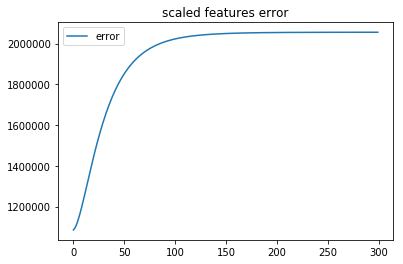

In [74]:
error_df.plot(title = 'scaled features error')

**Solution:** It take some iterations to get convergence with high learning rate and small iterations.

**[10 points]** e) Finally consider the Lasso regularized OLS. 

$$ \hat F_{\lambda}(\beta) : = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \beta \cdot \mathbf{x}_i)^2 = \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^1}, $$


Using the optimal $\lambda$ found in Problem 4, rewrite your gradient descent algorithm for this reguarlized norm. Ensure you used your scaled features. 

In [75]:
def fprimebest(x, y, beta):
    return(2*x.T.dot(x).dot(beta) - 2*x.T.dot(y).T[0]+best)
def gdbest(lam, beta0, steps, x, y):
    beta = beta0
    error_list = []
    for i in range(steps):
        delta = fprimebest(x, y, beta)
        beta = beta - lam*delta
        error = sum((y - beta.dot(x.T))**2)
        error_list.append(error)
    return beta, error_list

result = gdbest(lam = 0.0001, beta0 = np.array([0,0,0,0]), steps = 300, \
                          x = X_scaled.values, y = y_scaled.values)
beta = result[0]
error_df = pd.DataFrame(result[1], columns = ['error'])
error_df.head()

,error
0,1.085438e+06
1,1.091081e+06
2,1.099831e+06
3,1.111223e+06
4,1.124844e+06


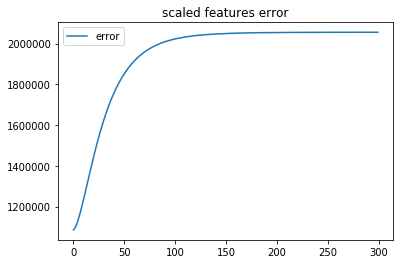

In [76]:
error_df.plot(title = 'scaled features error')